In [32]:
#Importing data from csv
from pandas import read_csv
import pandas as pd

terran_data = read_csv('../Output/TerranMarch.csv', header=0, index_col=False)
display(terran_data)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,...,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,viking,warhound,widowmine,win
0,0,World of Sleepers LE,us,437,T,P,0.0,1,0,Player 1 - INnoVation (Terran),...,0,0,0,0,0,0,0,0,0,1
1,0,World of Sleepers LE,us,437,T,P,117.6,480,30,Player 1 - INnoVation (Terran),...,0,0,0,1,0,0,0,0,0,1
2,0,World of Sleepers LE,us,437,T,P,197.4,960,60,Player 1 - INnoVation (Terran),...,0,0,0,1,0,0,0,0,0,1
3,0,World of Sleepers LE,us,437,T,P,200.2,1440,90,Player 1 - INnoVation (Terran),...,0,0,0,1,0,0,0,0,0,1
4,0,World of Sleepers LE,us,437,T,P,149.8,1920,120,Player 1 - INnoVation (Terran),...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69856,1983,Eternal Empire LE,eu,1610,T,Z,159.6,33600,2100,Player 2 - LiquidClem (Terran),...,2,2,0,15,0,0,0,0,11,0
69857,1983,Eternal Empire LE,eu,1610,T,Z,229.6,34080,2130,Player 2 - LiquidClem (Terran),...,2,2,0,15,0,0,0,0,11,0
69858,1983,Eternal Empire LE,eu,1610,T,Z,169.4,34560,2160,Player 2 - LiquidClem (Terran),...,2,2,0,15,0,0,0,0,12,0
69859,1983,Eternal Empire LE,eu,1610,T,Z,159.6,35040,2190,Player 2 - LiquidClem (Terran),...,2,2,0,15,0,0,0,0,10,0


In [33]:
from sklearn.preprocessing import MinMaxScaler

no_normalize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(terran_data) if x not in no_normalize]

#Normalizing these columns
norm = terran_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
terran_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=terran_data.index)

#One-hot Encoding the categorical variables
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(terran_data['map_name'], prefix='Map'))
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(terran_data['region'], prefix='Region'))
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(terran_data['enemy_race'], prefix='Enemy'))

#Displaying first and last 5 rows
display(terran_data_normalized.head(5), terran_data_normalized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
0,0.000000,0.115385,0.060,0.034965,0.004850,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
1,0.278146,0.125000,0.070,0.034965,0.004850,0.129199,0.031915,0.001706,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
2,0.466887,0.144231,0.080,0.053613,0.006305,0.129199,0.042553,0.008532,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
3,0.473510,0.163462,0.090,0.053613,0.013095,0.154079,0.058511,0.011945,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
4,0.354305,0.173077,0.095,0.053613,0.039286,0.134175,0.042553,0.016212,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0


,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
69856,0.377483,0.596154,0.835,0.543124,0.043166,0.263551,0.287234,0.553754,0.425134,0.567680,...,0,0,0,0,1,0,0,0,0,1
69857,0.543046,0.432692,0.740,0.543124,0.006790,0.124222,0.138298,0.540102,0.489305,0.597062,...,0,0,0,0,1,0,0,0,0,1
69858,0.400662,0.394231,0.690,0.543124,0.016490,0.193887,0.063830,0.532423,0.486631,0.610958,...,0,0,0,0,1,0,0,0,0,1
69859,0.377483,0.355769,0.565,0.508159,0.058687,0.293407,0.069149,0.460751,0.352941,0.649567,...,0,0,0,0,1,0,0,0,0,1
69860,0.000000,0.355769,0.665,0.508159,0.004171,0.263551,0.234043,0.468430,0.377005,0.649567,...,0,0,0,0,1,0,0,0,0,1


In [34]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(terran_data_normalized) if x not in no_X]

Y = terran_data_normalized['win']
X_normalized = terran_data_normalized[yes_X]

In [35]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(X_normalized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)


Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]


X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)]
X_normalized_test = X_normalized[(num_val + num_train):]

In [36]:
X_train = terran_data_normalized[0:num_train]
X_val = terran_data_normalized[num_train:(num_train + num_val)]
X_test = terran_data_normalized[(num_val + num_train):]

In [37]:
Y_train.shape

(44711,)

In [38]:
X_train.shape

(44711, 132)

In [39]:
import numpy as np

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=X_train, val_df=X_val, test_df=X_test,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [40]:
w1 = WindowGenerator(input_width=15, label_width=15, shift=1,
                     label_columns=['win'])
w1

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']

In [41]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [42]:
import tensorflow as tf
tf.random.set_seed(1111)

# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(X_normalized[:w1.total_window_size])])



example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (1, 16, 131)
Inputs shape: (1, 15, 131)
labels shape: (1, 15, 1)


In [43]:
import matplotlib.pyplot as plt

def plot(self, model=None, plot_col='win', max_subplots=1):
  inputs, labels = self.example
  plt.figure(figsize=(20,15))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time Step')

WindowGenerator.plot = plot

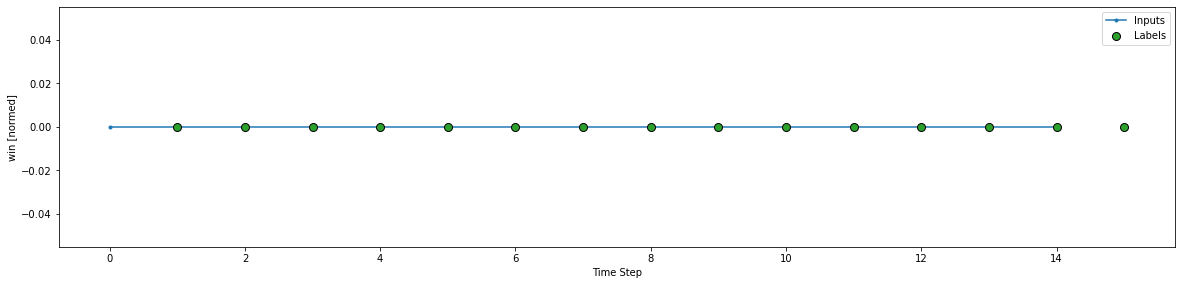

In [44]:
w1.example = example_inputs, example_labels
w1.plot()

In [45]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [46]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [47]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['win'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['win']

In [48]:
wide_window = WindowGenerator(
    input_width=15, label_width=15, shift=1,
    label_columns=['win'])

wide_window

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']

In [49]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=3):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                     callbacks=[early_stopping])
    return history

In [50]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [51]:
val_performance = {}
performance = {}

history_linear = compile_and_fit(linear, wide_window)

val_performance['Linear'] = linear.evaluate(wide_window.val)
performance['Linear'] = linear.evaluate(wide_window.test, verbose=2)

Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/100
1397/1397 [=====================

1397/1397 [==============================] - 2s 2ms/step - loss: 0.0715 - binary_accuracy: 0.9854 - precision_3: 0.9850 - recall_3: 0.9851 - auc_3: 0.9911 - val_loss: 0.0690 - val_binary_accuracy: 0.9863 - val_precision_3: 0.9874 - val_recall_3: 0.9872 - val_auc_3: 0.9911
Epoch 26/100
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0715 - binary_accuracy: 0.9854 - precision_3: 0.9850 - recall_3: 0.9851 - auc_3: 0.9911 - val_loss: 0.0690 - val_binary_accuracy: 0.9863 - val_precision_3: 0.9874 - val_recall_3: 0.9872 - val_auc_3: 0.9911
Epoch 27/100
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0714 - binary_accuracy: 0.9854 - precision_3: 0.9850 - recall_3: 0.9851 - auc_3: 0.9911 - val_loss: 0.0690 - val_binary_accuracy: 0.9863 - val_precision_3: 0.9874 - val_recall_3: 0.9872 - val_auc_3: 0.9911
Epoch 28/100
1397/1397 [==============================] - 3s 2ms/step - loss: 0.0714 - binary_accuracy: 0.9854 - precision_3: 0.9850 - recall_3: 0.9851 - a

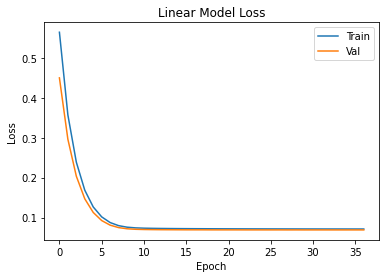

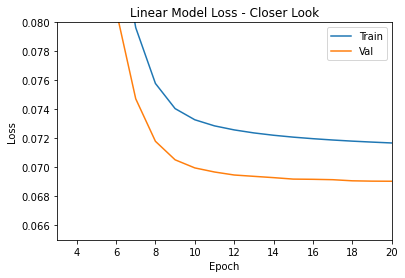

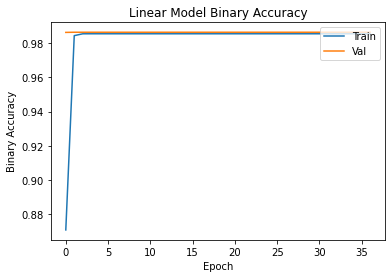

In [52]:
import matplotlib.pyplot as plt

#Linear Model Loss
plt.plot(history_linear.history['loss'])
plt.plot(history_linear.history['val_loss'])
plt.title('Linear Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#Linear Model Loss
plt.plot(history_linear.history['loss'])
plt.plot(history_linear.history['val_loss'])
plt.title('Linear Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.065,0.08)
plt.xlim(3,20)
plt.show()

#Linear Model Binary Accuracy
plt.plot(history_linear.history['binary_accuracy'])
plt.plot(history_linear.history['val_binary_accuracy'])
plt.title('Linear Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

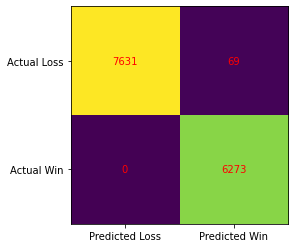

In [53]:
#Confusion matrix for Test set using Linear model 

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_test, linear.predict_classes(X_test))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

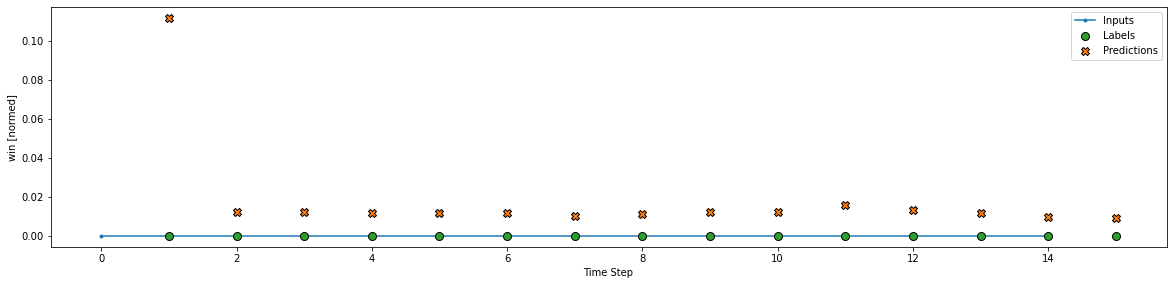

In [54]:
#Linear

wide_window.plot(linear)

In [55]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=131, activation='sigmoid'),
    tf.keras.layers.Dense(units=65, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

history_dense = compile_and_fit(dense, wide_window)

val_performance['Dense'] = dense.evaluate(wide_window.val)
performance['Dense'] = dense.evaluate(wide_window.test, verbose=0)

Epoch 1/100
1397/1397 [==============================] - 4s 3ms/step - loss: 0.1748 - binary_accuracy: 0.9488 - precision_4: 0.9535 - recall_4: 0.9410 - auc_4: 0.9843 - val_loss: 0.0684 - val_binary_accuracy: 0.9862 - val_precision_4: 0.9872 - val_recall_4: 0.9872 - val_auc_4: 0.9901
Epoch 2/100
1397/1397 [==============================] - 4s 3ms/step - loss: 0.0677 - binary_accuracy: 0.9853 - precision_4: 0.9848 - recall_4: 0.9851 - auc_4: 0.9920 - val_loss: 0.0581 - val_binary_accuracy: 0.9862 - val_precision_4: 0.9866 - val_recall_4: 0.9879 - val_auc_4: 0.9943
Epoch 3/100
1397/1397 [==============================] - 3s 2ms/step - loss: 0.0543 - binary_accuracy: 0.9853 - precision_4: 0.9845 - recall_4: 0.9854 - auc_4: 0.9966 - val_loss: 0.0442 - val_binary_accuracy: 0.9862 - val_precision_4: 0.9872 - val_recall_4: 0.9872 - val_auc_4: 0.9983
Epoch 4/100
1397/1397 [==============================] - 3s 2ms/step - loss: 0.0423 - binary_accuracy: 0.9854 - precision_4: 0.9850 - recall_4: 0

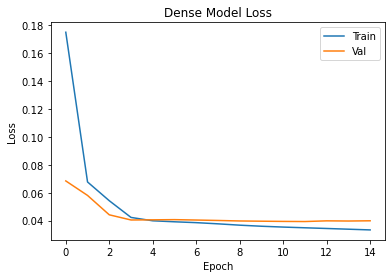

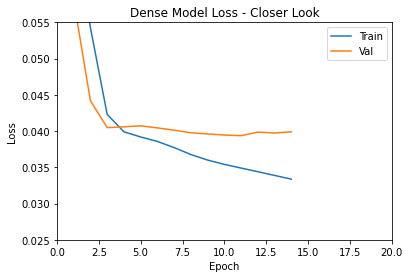

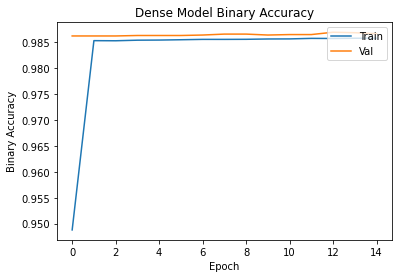

In [56]:
#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.025,0.055)
plt.xlim(0,20)
plt.show()

#Dense Model Binary Accuracy
plt.plot(history_dense.history['binary_accuracy'])
plt.plot(history_dense.history['val_binary_accuracy'])
plt.title('Dense Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

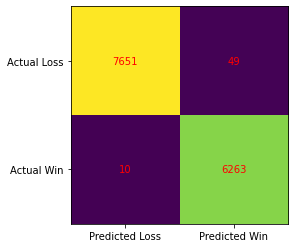

In [57]:
#Confusion matrix for Test set using Dense NN

cm = confusion_matrix(Y_test, dense.predict_classes(X_test))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

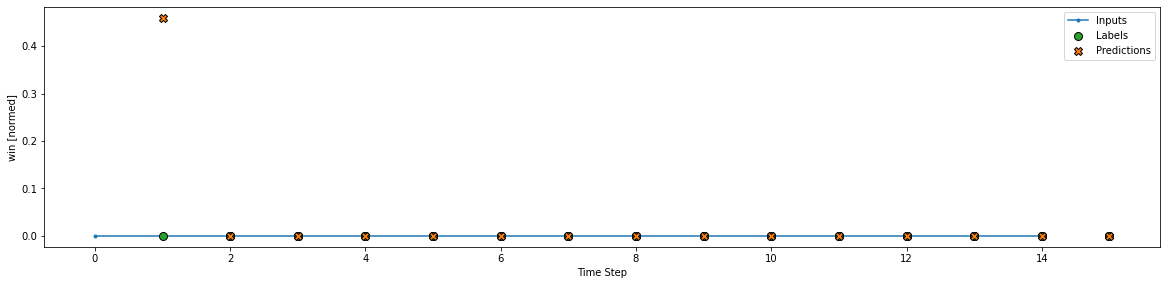

In [58]:
#Dense

wide_window.plot(dense)

In [59]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [60]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 15, 132)
Output shape: (32, 15, 1)


In [61]:
history_lstm = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
1397/1397 [==============================] - 8s 6ms/step - loss: 0.1291 - binary_accuracy: 0.9688 - precision_5: 0.9665 - recall_5: 0.9698 - auc_5: 0.9891 - val_loss: 0.0627 - val_binary_accuracy: 0.9861 - val_precision_5: 0.9872 - val_recall_5: 0.9871 - val_auc_5: 0.9957
Epoch 2/100
1397/1397 [==============================] - 7s 5ms/step - loss: 0.0522 - binary_accuracy: 0.9855 - precision_5: 0.9852 - recall_5: 0.9852 - auc_5: 0.9974 - val_loss: 0.0470 - val_binary_accuracy: 0.9861 - val_precision_5: 0.9858 - val_recall_5: 0.9885 - val_auc_5: 0.9975
Epoch 3/100
1397/1397 [==============================] - 7s 5ms/step - loss: 0.0392 - binary_accuracy: 0.9870 - precision_5: 0.9866 - recall_5: 0.9868 - auc_5: 0.9987 - val_loss: 0.0431 - val_binary_accuracy: 0.9858 - val_precision_5: 0.9868 - val_recall_5: 0.9870 - val_auc_5: 0.9979
Epoch 4/100
1397/1397 [==============================] - 7s 5ms/step - loss: 0.0329 - binary_accuracy: 0.9884 - precision_5: 0.9880 - recall_5: 0

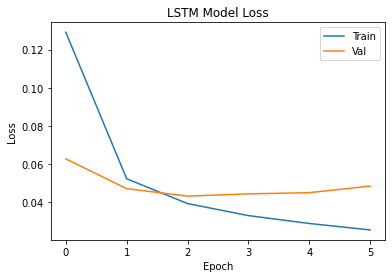

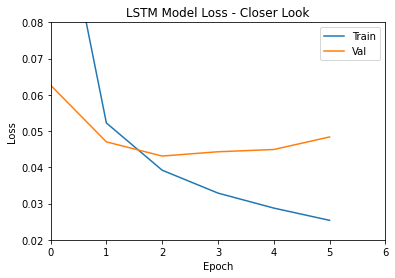

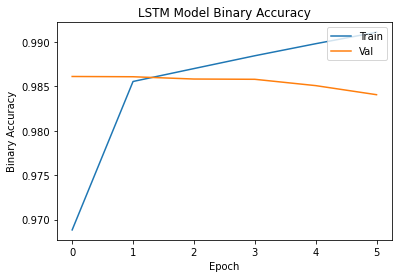

In [62]:
#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.02,0.08)
plt.xlim(0,6)
plt.show()

#LSTM Model Binary Accuracy
plt.plot(history_lstm.history['binary_accuracy'])
plt.plot(history_lstm.history['val_binary_accuracy'])
plt.title('LSTM Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

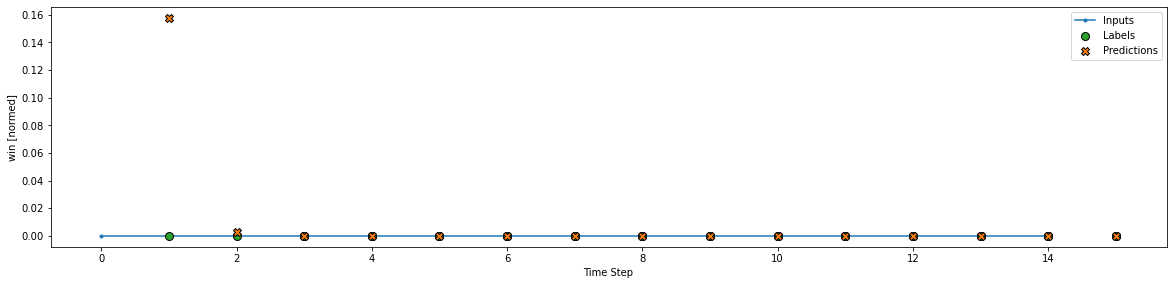

In [63]:
#LSTM

wide_window.plot(lstm_model)

In [64]:
gru_model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [65]:
history_gru = compile_and_fit(gru_model, wide_window)

val_performance['GRU'] = gru_model.evaluate(wide_window.val)
performance['GRU'] = gru_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
1397/1397 [==============================] - 8s 6ms/step - loss: 0.1160 - binary_accuracy: 0.9735 - precision_6: 0.9720 - recall_6: 0.9738 - auc_6: 0.9903 - val_loss: 0.0585 - val_binary_accuracy: 0.9861 - val_precision_6: 0.9871 - val_recall_6: 0.9872 - val_auc_6: 0.9960
Epoch 2/100
1397/1397 [==============================] - 7s 5ms/step - loss: 0.0506 - binary_accuracy: 0.9856 - precision_6: 0.9856 - recall_6: 0.9850 - auc_6: 0.9976 - val_loss: 0.0445 - val_binary_accuracy: 0.9864 - val_precision_6: 0.9863 - val_recall_6: 0.9886 - val_auc_6: 0.9978
Epoch 3/100
1397/1397 [==============================] - 7s 5ms/step - loss: 0.0399 - binary_accuracy: 0.9866 - precision_6: 0.9869 - recall_6: 0.9857 - auc_6: 0.9985 - val_loss: 0.0409 - val_binary_accuracy: 0.9866 - val_precision_6: 0.9862 - val_recall_6: 0.9890 - val_auc_6: 0.9979
Epoch 4/100
1397/1397 [==============================] - 7s 5ms/step - loss: 0.0353 - binary_accuracy: 0.9876 - precision_6: 0.9876 - recall_6: 0

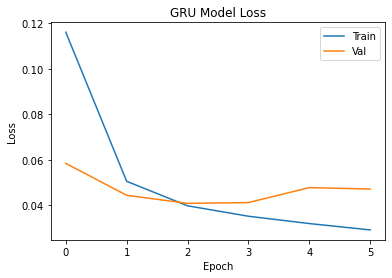

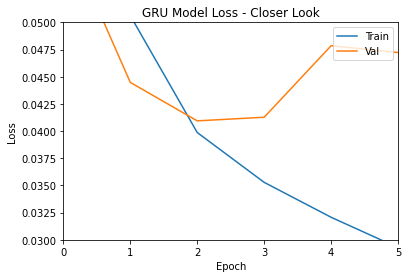

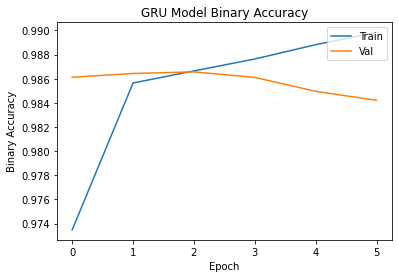

In [66]:
#GRU Model Loss
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#GRU Model Loss
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.03,0.05)
plt.xlim(0,5)
plt.show()

#GRU Model Binary Accuracy
plt.plot(history_gru.history['binary_accuracy'])
plt.plot(history_gru.history['val_binary_accuracy'])
plt.title('GRU Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

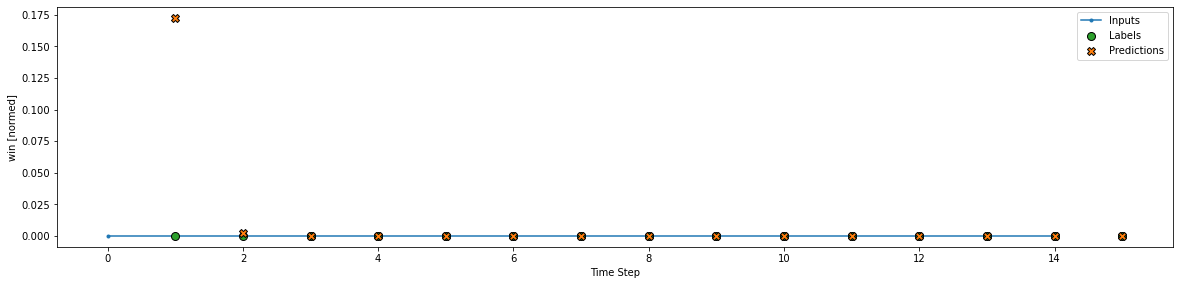

In [67]:
#GRU

wide_window.plot(gru_model)

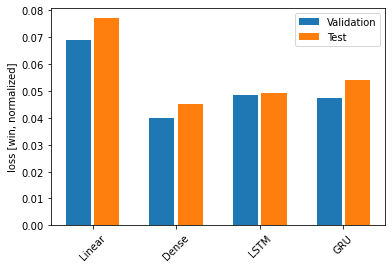

In [68]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('loss [win, normalized]')
plt.bar(x - 0.17, val_loss, width, label='Validation')
plt.bar(x + 0.17, test_loss, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()